### Read in data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("revlog.csv")

df.head(5) # first look into the data

,id,cid,usn,ease,ivl,lastIvl,factor,time,type
0,1540363189608,1540362429294,0,3,4,-60,2500,33865,0
1,1540363195750,1540362566043,0,3,4,-60,2500,6139,0
2,1540363220005,1540362642123,0,3,4,-60,2500,24252,0
3,1540363254083,1540362736118,0,2,-600,-60,0,34042,0
4,1540363312498,1540362917244,0,2,-600,-60,0,58411,0


### Clean data

In [9]:
## Change variable time from ms to s

df.time = df.time / 1000
df.time.head(3)

0    33.865
1     6.139
2    24.252
Name: time, dtype: float64

### Explore data

In [10]:
print(str(df.shape[0]) + "\trevisions by August 24th, 2020.")

print(str(df.cid.unique().shape[0]) + "\tcards total.")

100826	revisions by August 24th, 2020.
12182	cards total.


In [11]:
df.groupby("ease").time.mean() # average response time by self-rated difficulty

ease
1    22.853363
2    19.004718
3    15.311757
4     8.275466
Name: time, dtype: float64

In [12]:
# Add n_revisions per card to df

d = dict(df.cid.value_counts())
df["cid_revs"] = df.cid.map(d)

df.groupby("cid_revs").time.mean().sort_index().head(5) # response time ~ number of card revisions in total

cid_revs
1     8.012245
2     7.434382
3     9.911939
4    14.954811
5    16.838690
Name: time, dtype: float64

### Plotting

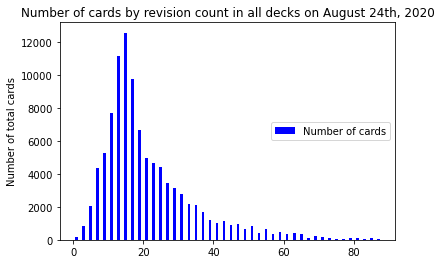

In [21]:
# Number of cards by number of revisions of each card

values = df.cid_revs.value_counts().sort_index()

position_X = list(range(1, len(values)*2, 2))

plt.bar(position_X, values, label="Number of cards", color="b")
plt.legend(loc="center right")
plt.title("Number of cards by revision count in all decks on August 24th, 2020")
plt.ylabel("Number of total cards")
plt.show()

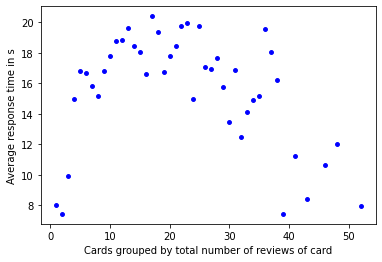

In [45]:
# Average response time ~ number of revisions of each card

values = df.groupby("cid_revs").time.mean()

plt.scatter(values.index, values.values, marker="o", color="b", s=15)
    
plt.xlabel("Cards grouped by total number of reviews of card")
plt.ylabel("Average response time in s")
plt.show()